In [59]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout

from keras.datasets import mnist

In [60]:
(x_train, y_train),(x_test,y_test)=mnist.load_data() # load data

In [61]:
# standartisation input data
x_train =x_train / 255
x_test=x_test / 255
# преобразование выходных значений в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

limit=5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]


In [62]:
# готовим модель для НС
model=keras.Sequential() 
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(300,activation='relu'))
Dropout(0.4) # p = 0.8
model.add(Dense(10,activation='softmax'))

In [63]:
# компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
# запуск процесса 80% - обучающая выборка, 20% - выборка валидации
his=model.fit(x_train_data,y_train_data,batch_size=32,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 0.5819 - accuracy: 0.8402 - val_loss: 0.3394 - val_accuracy: 0.9042
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 0.2438 - accuracy: 0.9310 - val_loss: 0.2977 - val_accuracy: 0.9154
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1633 - accuracy: 0.9564 - val_loss: 0.2463 - val_accuracy: 0.9270
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.1208 - accuracy: 0.9684 - val_loss: 0.2414 - val_accuracy: 0.9264
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0823 - accuracy: 0.9796 - val_loss: 0.2249 - val_accuracy: 0.9332
Epoch 6/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0590 - accuracy: 0.9868 - val_loss: 0.2183 - val_accuracy: 0.9340
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0406 - accuracy: 0.9922 - val_loss: 0.2220 - val_accuracy: 0.9358
Epoch 

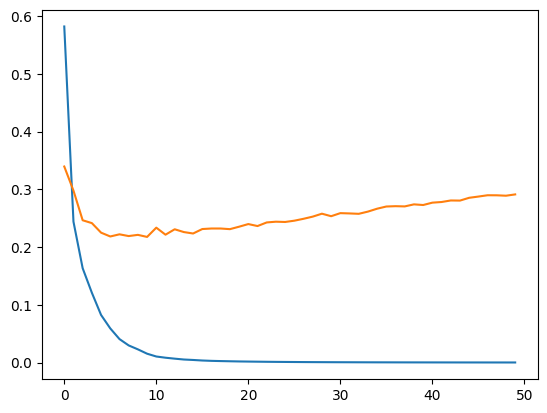

In [65]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()